# Assignment 1

In [1]:
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from networkx.algorithms import bipartite
import random
import math
import json
import re
import os
from io import BytesIO

In [2]:
def add_new_node(g):
    node_id_list = list(dict(g.degree()).keys())
    node_degree_list = list(dict(g.degree()).values())
    node_prop = np.array(node_degree_list)/np.sum(node_degree_list)

    new_node_id = len(node_id_list)
    link_node_id = random.choices(node_id_list, weights=node_prop, k=1)[0]
    g.add_edge(new_node_id, link_node_id)

def load_online_gml(url):
    with urllib.request.urlopen(url) as response:
        online_gml = BytesIO(response.read())
    net = nx.read_gml(online_gml)
    return net

def my_histogram(values,bins=10,nozero=False):
    nums, bin_edges = np.histogram(values,bins=bins)
    num_list = []
    bin_list = []
    for i in range(1,len(bin_edges)):
        if nozero and nums[i-1] == 0:
            continue
        num_list.append(nums[i-1])
        bin_list.append((bin_edges[i-1]+bin_edges[i])/2)
    return num_list,bin_list

def show_degree_distribution(degrees_label_list,bins=25,nozero=False,style="-"):
    d_num_bin_list = []

    for d_list,l in degrees_label_list:
        d_num_list,d_bin_list = my_histogram(d_list,bins,nozero)
        d_num_bin_list.append([d_num_list,d_bin_list,l])

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    for d_num_list,d_bin_list,l in d_num_bin_list:
        plt.plot(d_bin_list,d_num_list,style,label=l)
    plt.xlabel('Degree (k)')
    plt.ylabel('Number of Nodes')
    plt.title('Networks degree linear distribution')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.2)

    plt.subplot(1, 2, 2)
    for d_num_list,d_bin_list,l in d_num_bin_list:
        plt.plot(d_bin_list,d_num_list,style,label=l)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (k)')
    plt.ylabel('Number of Nodes')
    plt.title('Networks degree log-log distribution')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.show()

# Assignment 1.1: Exploring WS and BA models

## Week 3 Part 1: Small world networks
*Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
>> Random networks lack outliers. The example given was that in a random society where we estimate a typical person to know about 1000 individuals, the least connected individual is expected to have 816 connections, and the most connected individual was expected to have 1185 connections. The number of friends a typical individual has would be in the range of 968-1032, which is a narrow window. This is clearly not comparable to what can be observed in real life, in which we would expect some individuals to have very few connections (possibly <100), and some who have many connections (one example was that President Roosevelt had about 22000 connections). What was mentioned at the end of the chapter was that a random network would imply that an invididual, such as a student in US, was equally likely to have a connection with a random worker in China and one of their own classmates, which is obviously not the case in reality.
>> 
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
>> Subcritical Regime: 0 < $\langle k \rangle$ < 1, the network consists of numerous tiny components. The components have comparable sizes, lacking a clear winner that could be designated as a giant component
>> 
>> Critical Point: $\langle k \rangle$ = 1, most nodes are located in numerous small components. Components of rather different sizes exists. These small components are mainly trees, whereas the giant component may contain loops.
>> 
>> Supercritical Regime: $\langle k \rangle$ > 1, there will be a giant component that looks like a network. Numerous isolated components coexist with the giant component. The small components are trees, whereas the giant component contains loops and cycles. This regime lasts until all nodes are absorbed by the giant component
>> 
>> Connected Regime: $\langle k \rangle$ > lnN, the giant component absorbs all nodes and components. The network becomes connected.
>> 
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
>> It’s a problem because in random networks the clustering coefficient is the same for all nodes and very low, while in real networks clustering is much higher and decreases as degree increases. This shows that random networks do not match the structure seen in real systems.

*Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 

In [3]:
N = 500
K = 4
g_ws_0 = nx.watts_strogatz_graph(N,K,0)
g_ws_1 = nx.watts_strogatz_graph(N,K,0.1)
g_ws_2 = nx.watts_strogatz_graph(N,K,1)

print("p=0, <d>={}".format(nx.average_shortest_path_length(g_ws_0)))
print("p=0.1, <d>={}".format(nx.average_shortest_path_length(g_ws_1)))
print("p=1, <d>={}".format(nx.average_shortest_path_length(g_ws_2)))

p=0, <d>=62.875751503006015
p=0.1, <d>=7.8697715430861725
p=1, <d>=4.765851703406813


> * Describe what happens to the network when $p = 1$.
>> The real $\langle d \rangle$ is close to expect $\langle d \rangle$ of fully random network, which means the WS model is become a fully random network when $p = 1$
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

When p=0.9497693754232976 the average shortest path length gets close to the short paths in a fully randomized network.


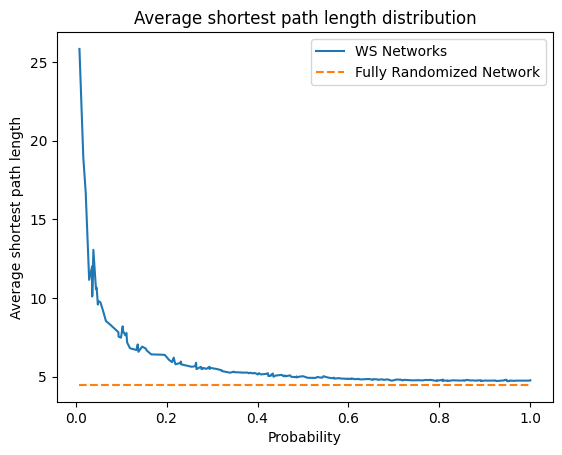

Figure 1: Comparison of the WS network and the fully randomized network on the same number of nodes and average degree. The x-axis shows the edge rewire probability, while the y-axis shows the average shortest path length. The average shortest path length of fully randomized network is the expected value.


In [4]:
D = float(np.log(N)/np.log(K))

p_list = []
d_list = []
closest_p = None
min_dist = None
for i in range(200):
    p = random.random()
    g = nx.watts_strogatz_graph(N,K,p)
    d = nx.average_shortest_path_length(g)
    p_list.append(p)
    d_list.append(d)
    dist = abs(D-d)
    if min_dist is None or dist < min_dist:
        closest_p = p
        min_dist = dist

print("When p={} the average shortest path length gets close to the short paths in a fully randomized network.".format(closest_p))

p_list, d_list = zip(*sorted(zip(p_list, d_list), key=lambda x: x[0]))

plt.plot(p_list,d_list,label="WS Networks")
plt.plot(p_list,[D]*len(p_list),"--",label="Fully Randomized Network")
plt.xlabel('Probability')
plt.ylabel('Average shortest path length')
plt.title('Average shortest path length distribution')
plt.legend()
plt.show()
print("Figure 1: Comparison of the WS network and the fully randomized network on the same number of nodes and average degree. The x-axis shows the edge rewire probability, while the y-axis shows the average shortest path length. The average shortest path length of fully randomized network is the expected value.")

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).

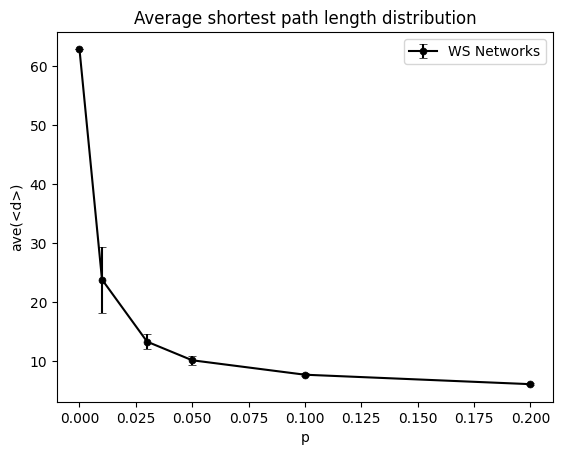

Figure 2: Comparison of the average shortest path length distribution and error in different edge rewire probabilities of WS network. The x-axis shows the edge rewire probability, while the y-axis shows the average shortest path length.


In [5]:
p_list= [0,0.01,0.03,0.05,0.1,0.2]
d_avg_list = []
d_std_list = []
for p in p_list:
    d_list = []
    for i in range(50):
        g = nx.watts_strogatz_graph(N,K,p)
        d = nx.average_shortest_path_length(g)
        d_list.append(d)
    d_avg = np.mean(d_list)    
    d_std = np.std(d_list)
    d_avg_list.append(d_avg)
    d_std_list.append(d_std)

plt.errorbar(p_list, d_avg_list, d_std_list, fmt='-o', color='black', ms=5, mew=0.5, capsize=3,label="WS Networks")
plt.xlabel('p')
plt.ylabel('ave(<d>)')
plt.title('Average shortest path length distribution')
plt.legend()
plt.show()
print("Figure 2: Comparison of the average shortest path length distribution and error in different edge rewire probabilities of WS network. The x-axis shows the edge rewire probability, while the y-axis shows the average shortest path length.")

> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.
>> In WS network, as the increase of connect probability, the variation range of the average shortest path length decreases, and it will get closer to the theoretical average shortest path length of a random network.

## Week 3 Part 2: Scale-free networks

*Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
>> Anomalous Regime: $\gamma \leq 2$, the number of links connected to the largest hub grows faster than the size of the network, the large scale-free network can not exist in this regime.
>> 
>> Scale-Free Regime: $2 < \gamma < 3$, the network is ultra-small scalefree network.
>> 
>> Random Network Regime: $\gamma > 3$, scale-free networks with large $\gamma$ are hard to distinguish from a random network, which means it is difficult to prove their scale-free nature.
>> 
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
>> Sublinear Regime: $0 < \alpha < 1$, the degree distribution follows the stretched exponential, the hubs are fewer and smaller than in a scale-free network.
>>
>> Linear Regime: $\alpha = 1$, the degree distribution follows a power law, which corresponds to the Barabási-Albert model.
>>
>> Superlinear Regime: $\alpha > 1$, the earliest nodes become super hubs and all subsequent nodes link to them.
>
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

In [6]:
g_ba = nx.Graph({0:(1,2), 1:(2,),2:()})
list(g_ba.degree)

[(0, 2), (1, 2), (2, 2)]

> * Now add another node, connecting one of the existing nodes in proportion to their degree.

In [7]:
add_new_node(g_ba)
list(g_ba.degree)

[(0, 2), (1, 2), (2, 3), (3, 1)]

> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.

In [8]:
for i in range(100-len(g_ba.nodes)):
    add_new_node(g_ba)
print(g_ba)

Graph with 100 nodes and 100 edges


> * Plot the network. 

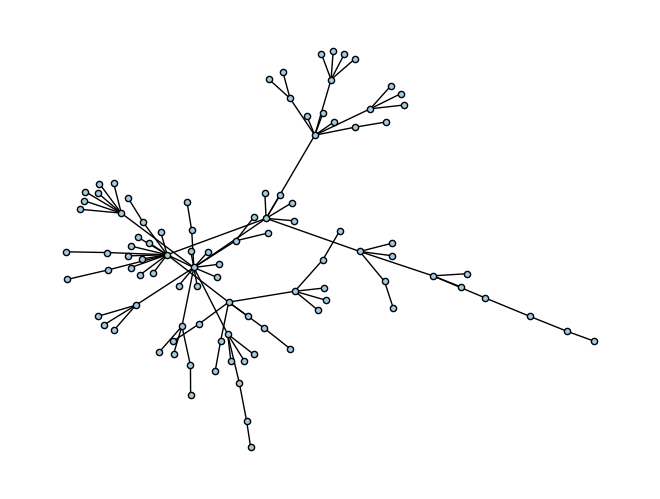

Figure 3: A Scale-free networks with 100 nodes and 100 edges.


In [9]:
nx.draw(g_ba, node_size=20, node_color="#A0CBE2", edgecolors="#000000")
plt.show()
print("Figure 3: A Scale-free networks with {} nodes and {} edges.".format(len(g_ba.nodes),len(g_ba.edges)))

> * Add more nodes until you have a 5000 node network.

In [10]:
for i in range(5000-len(g_ba.nodes)):
    add_new_node(g_ba)
print(g_ba)

Graph with 5000 nodes and 5000 edges


> * What's the maximum and minimum degree?

In [11]:
node_degree_list = list(dict(g_ba.degree()).values())
print("The maximum degree is {}, and the minimum degree is {}.".format(np.max(node_degree_list),np.min(node_degree_list)))

The maximum degree is 89, and the minimum degree is 1.


> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.

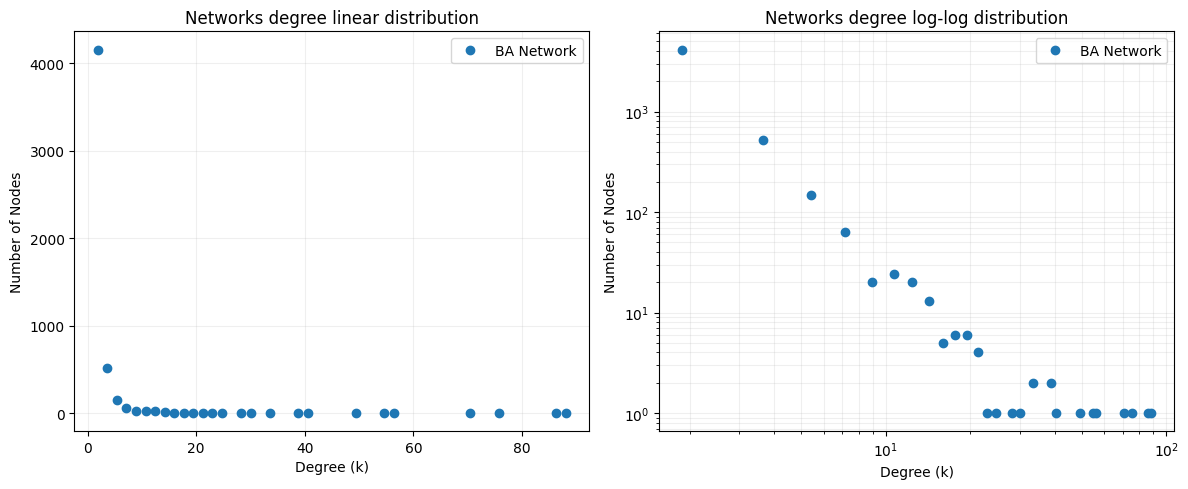

Figure 4: Comparison of the number of nodes in different degrees at the same scale-free network. The x-axis shows the degree, while the y-axis shows the number of nodes.


In [12]:
show_info = [
    [list(dict(g_ba.degree()).values()),"BA Network"],
]

show_degree_distribution(show_info,50,True,"o")
print("Figure 4: Comparison of the number of nodes in different degrees at the same scale-free network. The x-axis shows the degree, while the y-axis shows the number of nodes.")

# Assignment 1.2: Stats and visualization of the Rock Music Network

## Week 4 Part 2: Building the networks

In [13]:
net_url = "https://www.student.dtu.dk/~s230357/02805/assignment1/rock_performers_network.gml"
rp_dg_net = load_online_gml(net_url)

*Excercise*: Explain your process in words
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>> * Find all the nodes by regular expressions from a list page.
>> * Download and clean the wikitext for each node.
>> * Find possible links between nodes by using regular expressions to analysis the context of wikitext.
>> * Create directed graph based on nodes and found links.
>> * Use a regular expression to count the number of words as an attribute of each node.
>> * Drop the independent nodes first.
>> * And then find the largest component for further analysis
>> * 
>    * Then, write a short section about which part of the process that was most difficult
>> I think the most difficult part is cleaning data and getting useful information. For example, I delete the content after the reference in wikitext, because it's not the main content and will cost many words. And I also spent some time modifying regular expressions to make sure it can only find useful information and ignore the useless.
>> 
>    * Next write a short section about how you used LLMs to help you
>> I usually use LLM to help me understand the optional parameters of a function and the errors about encoding, which can bridge the gap between ideas and implementation. For example, I need to encode the string to avoid illegal characters when I need to use it as a URL or file name.
>> 
>    * Finally, compose a short section about what you would do differently if you had to do it again
>> I will analyse the structure of the source data to find out some exceptions first if I had to do it again.

*Exercise*: Simple network statistics and analysis
> * What is the number of nodes in the network? 

In [14]:
print("The number of nodes in the network is {}.".format(len(rp_dg_net.nodes)))

The number of nodes in the network is 484.


> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)

In [15]:
print("The number of links in the network is {}.".format(len(rp_dg_net.edges)))

The number of links in the network is 7217.


> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>> I found that the in-degree distribution is approximately a power law distribution, and the out-degree distribution shows a poisson distribution. I think the main reason is that all performers usually prefer to build relationship with few popular performers, which can explain why the in-degree distribution has the similar feature as the scale-free network. And the out-degree distribution shows the characteristics of random network, because  for each performer, the connections with popular performers is only a small portion of the total relationship, the most relationships are randomly established with other performers.

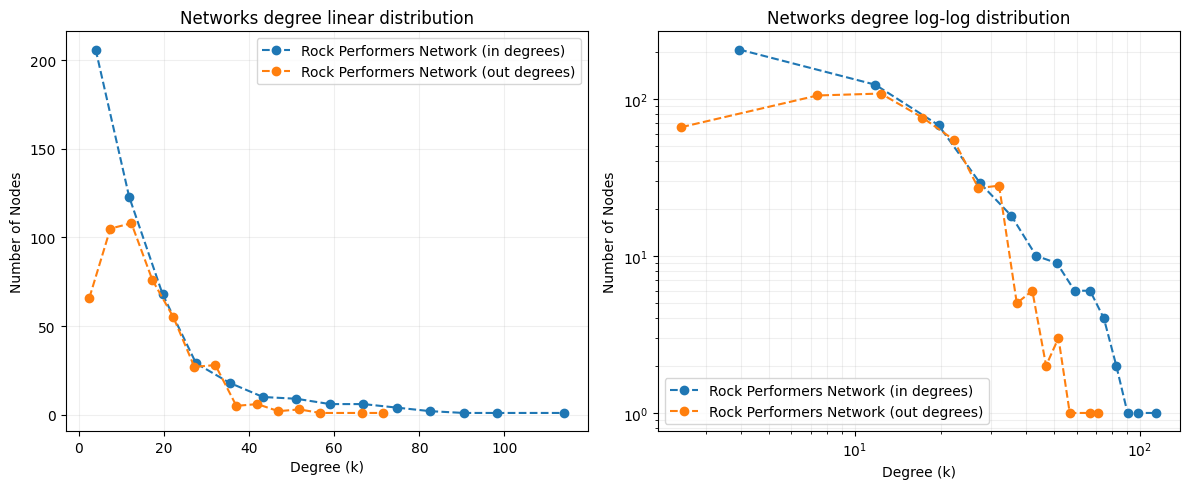

Figure 5: Comparison of the in-degree distribution and out-degree distribution of the largest component in Rock Performers Network. The x-axis shows the degree, while the y-axis shows the number of nodes.


In [16]:
rp_in_degrees = list(dict(rp_dg_net.in_degree).values())
rp_out_degrees = list(dict(rp_dg_net.out_degree).values())

show_info = [
    [rp_in_degrees,"Rock Performers Network (in degrees)"],
    [rp_out_degrees,"Rock Performers Network (out degrees)"]
]

show_degree_distribution(show_info,15,True,"--o")
print("Figure 5: Comparison of the in-degree distribution and out-degree distribution of the largest component in Rock Performers Network. The x-axis shows the degree, while the y-axis shows the number of nodes.")

>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.

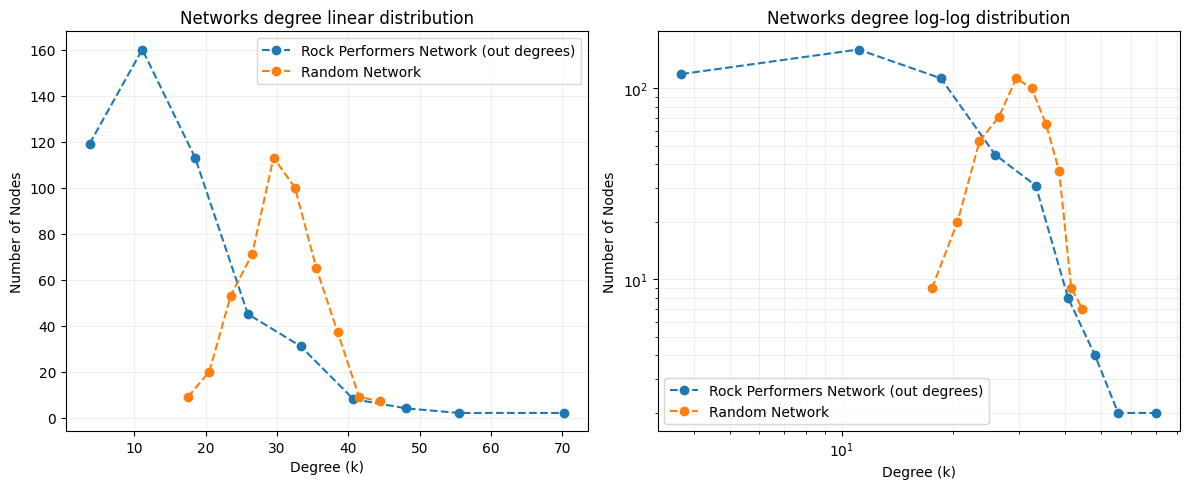

Figure 6: Comparison of the degree distribution of largest component in Rock Performers Network and a random network with the same number of nodes and edges. The x-axis shows the degree, while the y-axis shows the number of nodes.


In [17]:
er_net = nx.gnm_random_graph(len(rp_dg_net.nodes), len(rp_dg_net.edges))
er_degrees = list(dict(er_net.degree).values())

show_info = [
    [rp_out_degrees,"Rock Performers Network (out degrees)"],
    [er_degrees,"Random Network"],
]

show_degree_distribution(show_info,10,True,"--o")
print("Figure 6: Comparison of the degree distribution of largest component in Rock Performers Network and a random network with the same number of nodes and edges. The x-axis shows the degree, while the y-axis shows the number of nodes.")

>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.

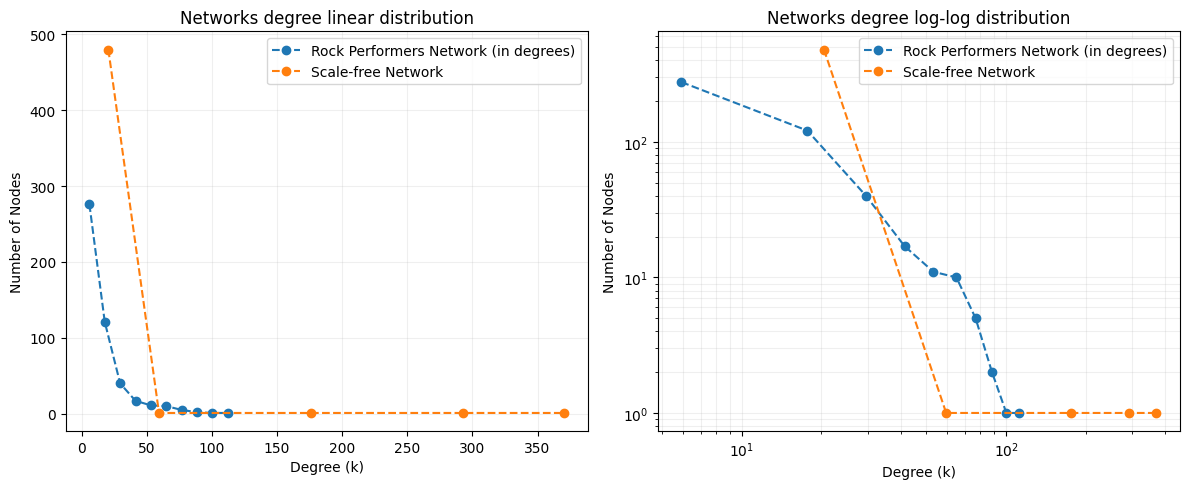

Figure 7: Comparison of the degree distribution of largest component in Rock Performers Network and a scale-free network with the same number of nodes. The x-axis shows the degree, while the y-axis shows the number of nodes.


In [18]:
ba_net = nx.scale_free_graph(len(rp_dg_net.nodes))
ba_degrees = list(dict(ba_net.degree).values())

show_info = [
    [rp_in_degrees,"Rock Performers Network (in degrees)"],
    [ba_degrees,"Scale-free Network"]
]

show_degree_distribution(show_info,10,True,"--o")
print("Figure 7: Comparison of the degree distribution of largest component in Rock Performers Network and a scale-free network with the same number of nodes. The x-axis shows the degree, while the y-axis shows the number of nodes.")

> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
>> The top 5 most connected performers for in-degrees are famous bands and artists, which is as same as what I expected.
>> 
>> The top 5 most connected performers for out-degrees are both bands. All of these bands are unstable, with some experiencing frequent personnel changes and others frequently changing their style. And this gives them a chance to build relationships with others.

In [19]:
rp_node_in_degrees = dict(rp_dg_net.in_degree)
sorted_in_degree_nodes = sorted(rp_node_in_degrees, key=rp_node_in_degrees.get, reverse=True)
print("The top 5 most connected performers for in-degrees are {}".format(sorted_in_degree_nodes[0:5]))

rp_node_out_degrees = dict(rp_dg_net.out_degree)
sorted_out_degree_nodes = sorted(rp_node_out_degrees, key=rp_node_out_degrees.get, reverse=True)
print("The top 5 most connected performers for out-degrees are {}".format(sorted_out_degree_nodes[0:5]))

The top 5 most connected performers for in-degrees are ['Led_Zeppelin', 'Bob_Dylan', 'Queen_(band)', 'Metallica', 'David_Bowie']
The top 5 most connected performers for out-degrees are ['Alice_in_Chains', 'Deep_Purple', 'Black_Sabbath', 'Def_Leppard', "Guns_N'_Roses"]


> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

In [20]:
rp_node_lengths = dict(rp_dg_net.nodes.data('length_of_the_content'))
sorted_length_nodes = sorted(rp_node_lengths, key=rp_node_lengths.get, reverse=True)
print("The Top 10 pages with the longest wiki entries are {}".format(sorted_length_nodes[0:10]))

The Top 10 pages with the longest wiki entries are ["Guns_N'_Roses", 'Queen_(band)', 'Coldplay', 'Marilyn_Manson_(band)', 'U2', 'The_Rolling_Stones', 'Bob_Dylan', 'Paul_McCartney', 'Elton_John', 'David_Bowie']


## Week4 Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.

In [21]:
rp_ug_net = nx.Graph(rp_dg_net)
print(rp_ug_net)

Graph with 484 nodes and 5930 edges


>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

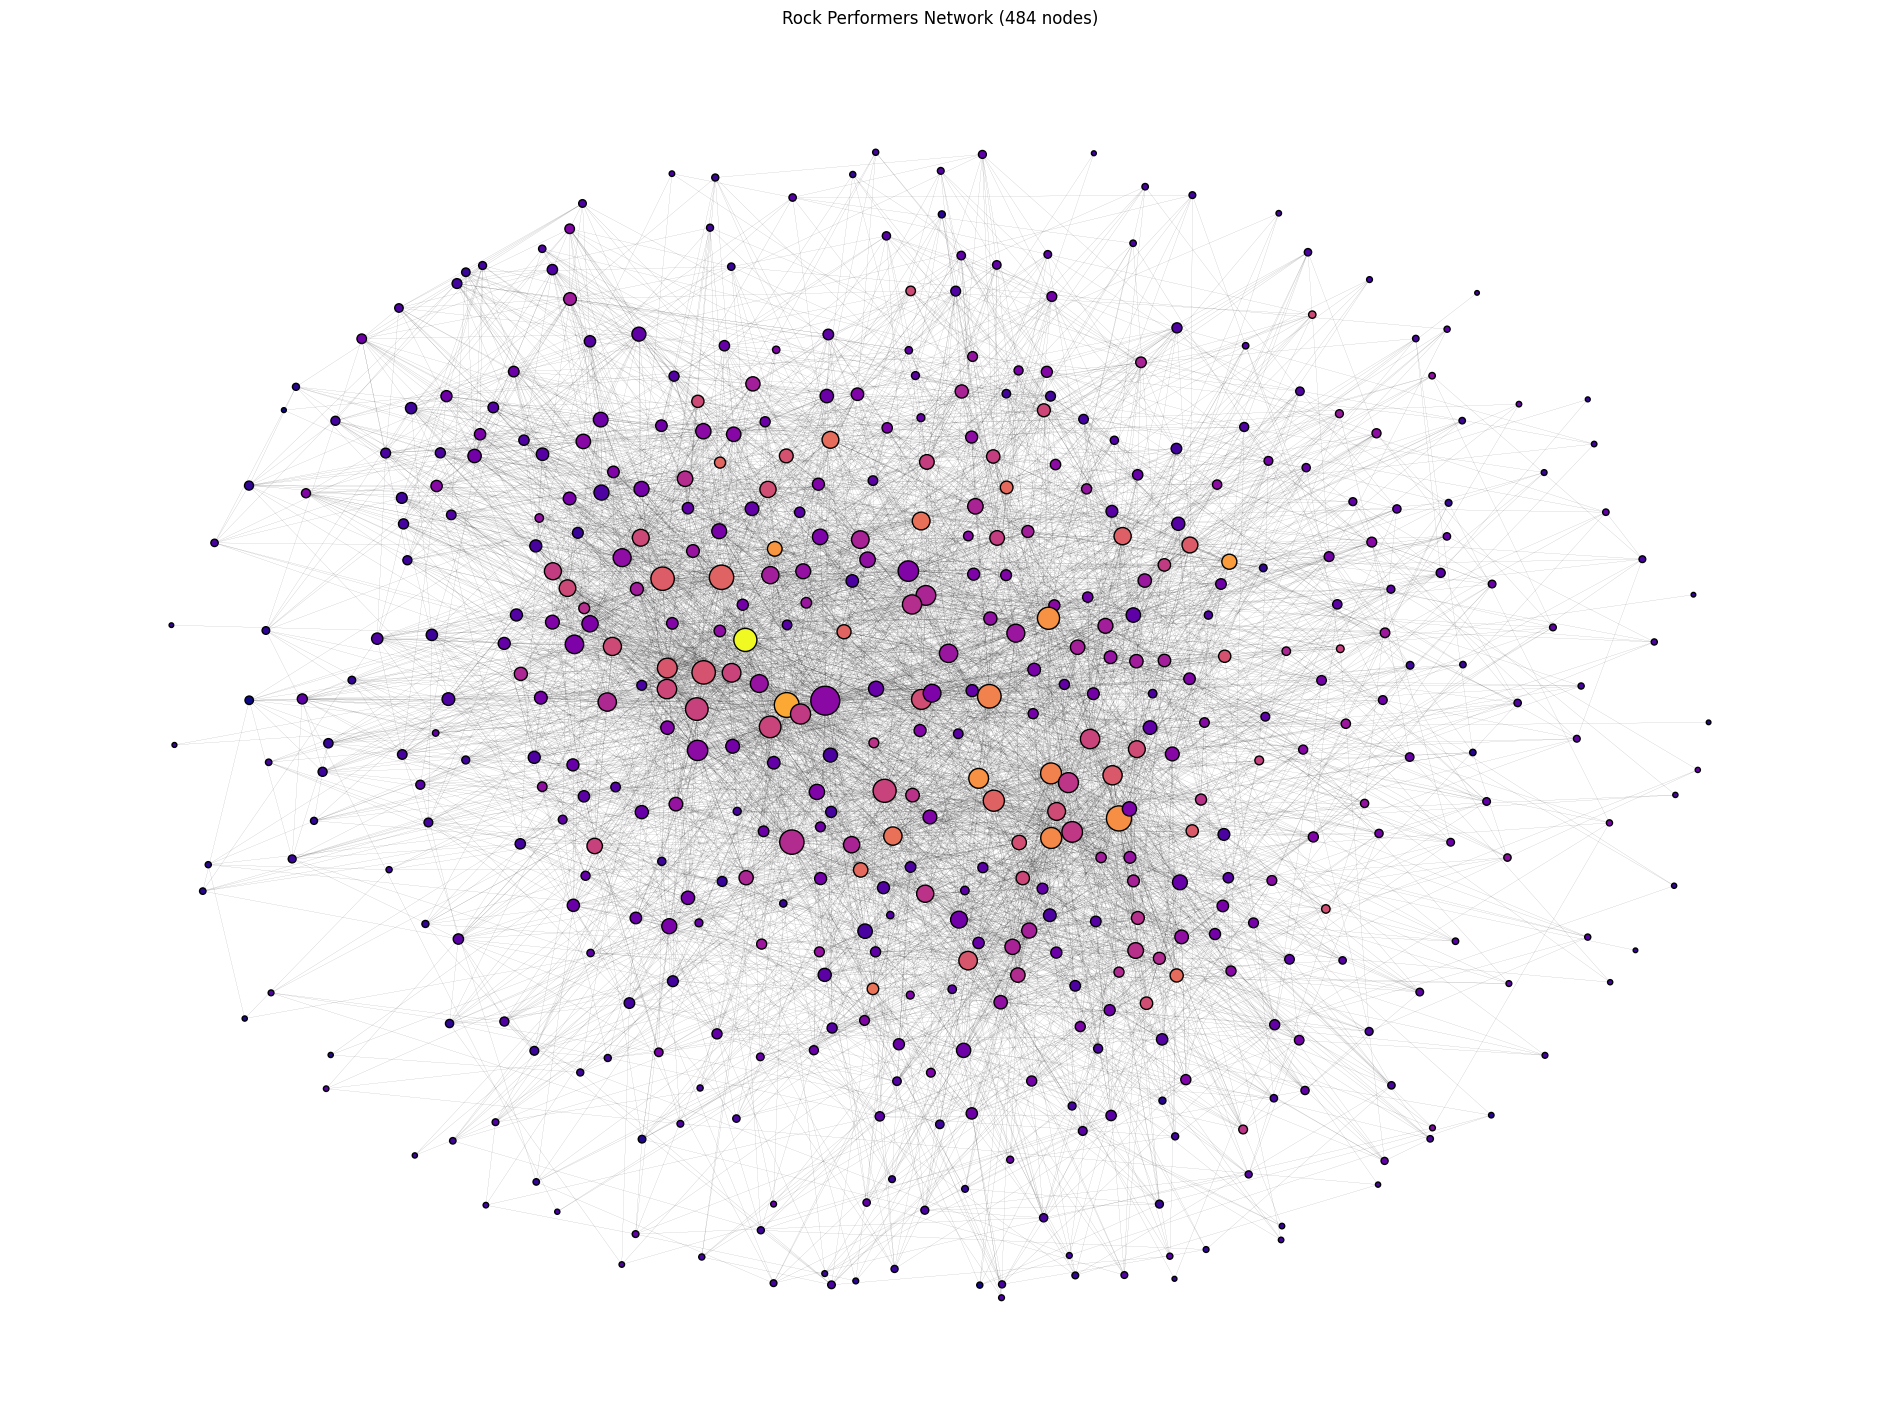

Figure 8: The largest component of Rock Performers Network. The node size depends on node degree, while the node color depends on the length of content.


In [22]:
pos_init = nx.kamada_kawai_layout(rp_ug_net)
pos = nx.spring_layout(rp_ug_net,pos=pos_init,k=0.9,iterations=40)

node_size_list = np.array(list(dict(rp_ug_net.degree).values()))**1.25+10

cmap = mpl.colormaps['plasma']
max_length = np.max(list(dict(rp_ug_net.nodes.data('length_of_the_content')).values()))
node_color_list = [cmap(v/max_length) for k,v in rp_dg_net.nodes.data('length_of_the_content')]

plt.figure(figsize=(24, 18))
plt.title('Rock Performers Network ({} nodes)'.format(len(rp_ug_net.nodes)))
nx.draw(rp_ug_net, pos, node_size=node_size_list, node_color=node_color_list, width=0.05, edgecolors="#000000")
plt.show()
print("Figure 8: The largest component of Rock Performers Network. The node size depends on node degree, while the node color depends on the length of content.")

Contribution:

All group members had a more or less equal contribution to all questions: each member completed all exercises individually, and the final assignment answers were determined through group discussion.